Observations

1. There was an almost equal split of male vs female mice and an even spread amongst the different drug regimens. With the tumour volume being strongly correlated to average mouse weight. It showed that as the mouse weight increased, so did the tumour volume.

2. Looking at several differnt mice in the Capomulin regimen, this treatment showed a decrease in tumour volume over time. Some individual mice had a slight upturn of tumour volume towards the last timepoint, but overall the decrease in tumour volume was significant.

3. Capomulin and Ramicame both had lower end tumour volume compared with Infubiol and Ceftamin. This suggests that the first two treatments were more effective in shrinking tumour size than the latter. The statistical analysis of the tumour volume data also confirms the these two drugs as being more effective, with the mean, median both being the lowest, indicating an average lower tumour volume.

In [2]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
combined_data.groupby("Mouse ID").count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
# print(duplicates)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()

b128    10
f545    10
l661    10
c139    10
s508    10
        ..
u153     1
b447     1
x226     1
o848     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = (clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]).mean()
median = (clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]).median()
var = (clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]).var()
std = (clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]).std()
sem = (clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]).sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.concat([mean,median,var,std,sem], axis=1)

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

In [9]:
pd.DataFrame(clean_data.groupby("Drug Regimen", as_index=False)["Mouse ID"].count())
# mouse_no_df.columns

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0.5, 1.0, 'Number of Mice in each Treatment')

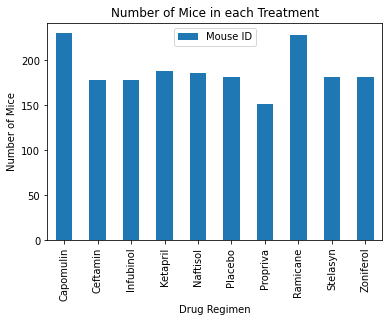

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_no_df_1 = pd.DataFrame(clean_data.groupby("Drug Regimen")["Mouse ID"].count())
mouse_no_df_1.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.title("Number of Mice in each Treatment")

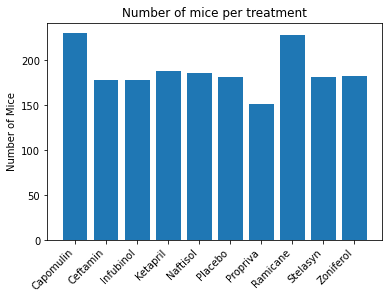

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_no_df = pd.DataFrame(clean_data.groupby("Drug Regimen", as_index=False)["Mouse ID"].count())
x_axis = np.arange(len(mouse_no_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mouse_no_df["Mouse ID"])
plt.ylabel("Number of Mice")
plt.title("Number of mice per treatment")
plt.xticks(tick_locations, mouse_no_df["Drug Regimen"], rotation=45,horizontalalignment="right")
plt.show()

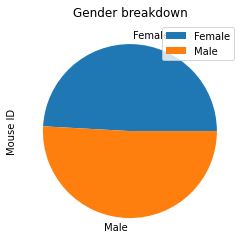

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df_1 = pd.DataFrame(clean_data.groupby("Sex")["Mouse ID"].count())
gender_df_1.plot.pie(subplots=True)
plt.title("Gender breakdown")
plt.show()


In [19]:
print(gender_df)

      Sex  Mouse ID
0  Female       925
1    Male       958


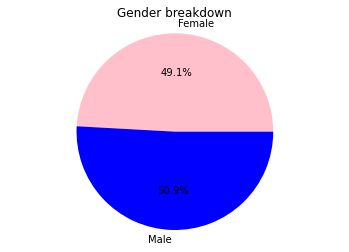

In [38]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
 gender_df = pd.DataFrame(clean_data.groupby("Sex", as_index=False)["Mouse ID"].count())
 sex = gender_df["Sex"]
 no_mice = gender_df["Mouse ID"]
 colours = ["Pink","Blue"]
 plt.pie(no_mice, labels=sex, colors=colours, autopct="%1.1f%%")
 plt.axis("equal")
 plt.title("Gender breakdown")
 plt.show()



Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = clean_data.groupby("Mouse ID")["Timepoint"].max()
# clean_data[clean_data["Drug Regimen"].isin(drugs)]
greatest_tumor2 = greatest_tumor.reset_index()
greatest_tumor2.merge(clean_data, on=["Mouse ID", "Timepoint"])
greatest_tumor2 = greatest_tumor2.merge(clean_data, on=["Mouse ID", "Timepoint"])
greatest_tumor2.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [22]:
 # Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumour_list = []
for x in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drg_df = greatest_tumor2[greatest_tumor2["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    # add subset 
    tumour_list.append(drg_df)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drg_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = drg_df[(drg_df<lower_bound) | (drg_df>upper_bound)]
    if len(outliers)>0:
        print (f"Outliers in drug {x}: {outliers}")
    


Outliers in drug Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


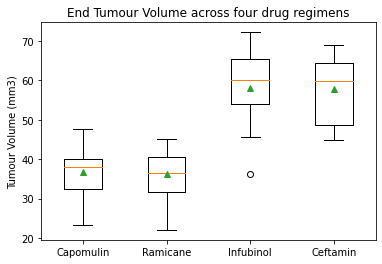

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumour_list, showmeans=True, labels=drugs)
plt.ylabel("Tumour Volume (mm3)")
plt.title("End Tumour Volume across four drug regimens")
plt.show()

Line and Scatter Plots

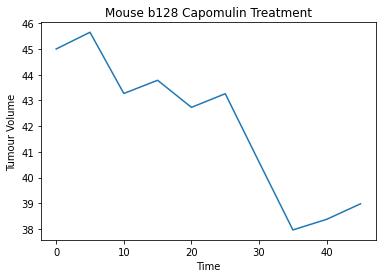

In [42]:
 # Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#  new_df = clean_data.groupby("Drug Regimen")["Timepoint"]["Tumor Volume (mm3)"]
 new_df = clean_data[(clean_data["Drug Regimen"]=="Capomulin") & (clean_data["Mouse ID"]=="b128")]
#  new_df[["Timepoint","Tumor Volume (mm3)"]].plot()
 plt.plot(new_df["Timepoint"], new_df["Tumor Volume (mm3)"])
 plt.title("Mouse b128 Capomulin Treatment")
 plt.xlabel("Time")
 plt.ylabel("Tumour Volume")
 plt.show()

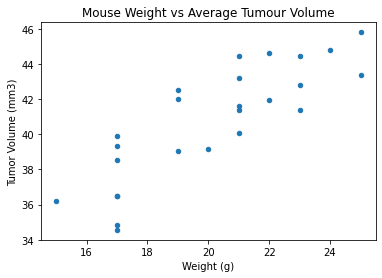

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_capomulin = clean_data[clean_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()
avg_capomulin.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumour Volume")
plt.show()

Correlation and Regression

In [ ]:
avg_capomulin.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


Corr = 0.8419363424694717


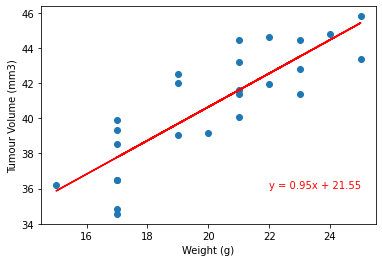

In [34]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_capomulin
corr = st.pearsonr(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])[0]
print(f"Corr = {corr}")

linear = st.linregress(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])
pred_line = avg_capomulin["Weight (g)"] * linear[0] + linear[1]
pred_line
plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])
plt.plot(avg_capomulin["Weight (g)"], pred_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (22,36), color="red")
plt.show()
